In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import folium
from scipy.stats import chi2_contingency
from geopy.geocoders import Nominatim 
pio.templates.default = "plotly_white"

import warnings
warnings.filterwarnings("ignore")

# Background 
Amazon Web Services (AWS) is a comprehensive and highly regarded cloud computing platform offered by Amazon.com. AWS has a rich and influential background that has shaped the landscape of cloud computing and technology services over the years.Provided are transaction data from SaaS company selling sales and marketing
software to other companies (B2B). Using Data scientist SAAS wants to improve in term of sales, profit, and even performance.

Herewith the requirement from the stake holder which is Sales team,Product team, Operational Team
 1. They want to know which product brings in the highest profit as well as which product is underperform
 2. They want to determine in each Customer segment which product they should focus on to increase sales
 3. They want to know Order growth each year to determine sales team Activity in each industry
 4. They want to know monthly profit each year as well as pattern on profit so they can focusing marketing strategy for underperform month
 5. They noticed several countries are giving them losses and wants to know the root cause
 6. They want to know wheter or not Industry in each country dependent on one another


# Data Understanding - Initial Data

In [59]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Data Understanding - Legend For Dataset

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

# Data Processing (Data Type ,Typing error, Duplicate, Missing Value, Unused Column, Other variable,Outliers)

## Data Type

From given Dataset and compare it to the legend available we can see there is miss match such as :

* Row Id from int64 to object
* Order Date from object to Datetime
* Customer ID from int63 to object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [61]:
df[['Row ID','Customer ID']] = df[['Row ID','Customer ID']].astype('object')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

## Typing Error

From data below we can assume that there is no typing error in each column provided by the dataset, so we don't have to take any action

In [62]:
dfObject=df[['Contact Name',
       'Country', 'City', 'Region', 'Subregion', 
       'Customer','Industry', 'Segment', 'Product']]

In [63]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in dfObject.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, Julia Ellison, Gordon McLean, Jessica Buckland, Bernadette Nolan, Sonia Ince, William Lewis, Melanie Young, Edward Oliver, Peter Quinn, Max Marshall, Jan Watson, Carol Ball, Gavin Walsh, Penelope Peake, Amy Scott, Carl Jackson, Joe Wallace, Luke Mills, Alexandra Dyer, Rebecca Dickens, Audrey Hardacre, Jennifer Dowd, Natalie Sanderson, Samantha Rampling, Sally Berry, Anthony Clark, Victor Short, Austin Newman, Rose Scott, Tim Morrison, Harry Murray, Dylan Dowd, Angela Parsons, Lisa Oliver, Joseph Duncan, Paul MacDonald, Gordon Graham, Sean Bower, Anthony Sanderson, Stewart Marshall, Joanne Carr, Angela Davies, William Alsop, Owen Watson, Melanie Davidson, Warren Forsyth, Gabrielle Ogden, Justin Randall, Jack Graham, Sophie Henderson, Brian Short, Samantha Lawrence, Una Hudson, Kimberly North, Dylan Ogden, Jonathan Clark, Kevin Vaughan, Madeleine Smith, Diana Ince, Tracey Knox, Michelle McLean, Diana Bell, Jan Clark, Pippa Smith, Rebecca Wilson, Irene Smith, ...]"
1,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
2,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José, Paris, Istanbul, Tokyo, Aichi, Wollongong, Hanover, Luxembourg, Salvador, Davao City, Kolkata, London, Brighton, Sydney, Puente Alto, Madrid, Rio de Janeiro, Cape Town, Lisboa, Uppsala, Bogotá, Brussels, Moscow, Canberra, The Hague, Mexico City, Manila, Geelong, Santiago, Aurora, Warsaw, Newark, Monterrey, Rome, Chicago, Singapore, Wellington, Osaka, Melbourne, Prague, Riyadh, Raleigh, Providence, Córdoba, Guadalajara, Oklahoma City, Puerto Vallarta, São Paulo, Johannesburg, Cologne, Rochester, Seattle, Detroit, Lafayette, Munich, St Petersburg, Buenos Aires, Mendoza, Leipzig, Jacksonville, Long Beach, Chiba, Incheon, Helsinki, Dhahran, Seoul, Dresden, Vancouver, Adelaide, Tel Aviv, Hordaland, Hamburg, Henderson, Kyiv, Leicester, Malmö, Berlin, Mumbai, Cardiff, Columbus, Fukuoka, Birmingham, Kanagawa, Liverpool, Abu Dhabi, Milwaukee, Yekaterinburg, Krakow, Frankfurt, Porto, Antofagasta, ...]"
3,Region,3,"[EMEA, AMER, APJ]"
4,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
5,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo, Carrefour, Costco Wholesale, McKesson, Siemens, Intel, Glencore, Procter & Gamble, Banco Santander, Pemex, Samsung Electronics, Sony, Morgan Stanley, Bank of America Corp., Tesco, Aviva, Mondelez International, Abbott Laboratories, Fannie Mae, Aetna, Oracle, Nissan Motor, Tyson Foods, Verizon Communications, Itochu, Daimler, Walgreens, Boeing, Valero Energy, Nestle, Philip Morris International, Trafigura Group, Walmart, Cisco Systems, Prudential Financial, Amazon, Gazprom, FedEx, Honda Motor, CVS Health, General Motors, State Farm Insurance Cos., Comcast, AmerisourceBergen, Johnson & Johnson, HonHai Precision Industry, American Express, J.P. Morgan Chase & Co., Kroger, Volkswagen

## Duplicate Values

There is no Duplicate value found, so we don't have to take any action

In [64]:
df.duplicated().sum()

0

## Missing Values

There is no Missing value found, so we don't have to take any action

In [65]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Unused Column
From given Dataset and compare it to the legend available we can Justify some column is duplicating function or representing other column such as :

* Row ID is representing indexing
* Date key is representing Order Date
* Customer ID is representing Customer name

We can just dropped selected column since it doesn't have any significance wether there is or there isn't

In [66]:
df.drop(columns='Row ID',axis=0,inplace=True)
df.drop(columns='Date Key',axis=0,inplace=True)
df.drop(columns='Customer ID',axis=0,inplace=True)

## Other variable

Lets check several varible using this rules :
1. Sales must not be minus
2. Qty must not be zero or lower
3. discount range must be from 0-100%

Outcome : no unatural varibel found

In [67]:
df['Sales'].min()

0.444

In [68]:
df['Quantity'].min()

1

In [69]:
display(df['Discount'].min(),df['Discount'].max())

0.0

0.8

## Outliers
Based on the information provided in the source referenced below, we can confidently deduce the presence of outliers in both the sales and profit columns. This inference is substantiated by the significant gap observed between the minimum and maximum values, which typically indicates a departure from a normal distribution.

The outcome of this analysis reveals a total of 1881 outliers in the sales column which Positively skewed and 1167 outliers in the profit column which have no skew. Upon conducting further investigations, we could not find sufficient evidence to support the notion that these outliers resulted from user input errors. Consequently, we have opted not to take any action to remove these outliers, as doing so could compromise the accuracy and integrity of the data.

In [70]:
df.describe(include='number')

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [71]:
Q1_amount = df['Profit'].describe()['25%']
Q3_amount = df['Profit'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['Profit'] < Q1_amount - (1.5 * iqr)) | (df['Profit']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['Profit'] > Q1_amount - (1.5 * iqr)) & (df['Profit'] < Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
13,AMER-2022-161389,2022-12-06,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,Tech,SMB,ContactMatcher,COK66F8IC1,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,EMEA-2020-143287,2020-11-11,Carl Ince,United Kingdom,Leicester,EMEA,UKIR,Intel,Tech,Enterprise,Support,Y7P04IW9QA,223.9200,4,0.00,109.7208
9962,APJ-2021-168088,2021-03-19,Harry Buckland,Japan,Tokyo,APJ,JAPN,News Corp.,Misc,Enterprise,Marketing Suite,X3DQP9NR9A,383.4656,4,0.32,-67.6704
9968,AMER-2023-153871,2023-12-12,Connor Paige,Argentina,Rosario,AMER,LATAM,AT&T,Communications,SMB,ContactMatcher,X2Y98BQ3KE,735.9800,2,0.00,331.1910
9979,AMER-2022-103674,2022-12-07,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,Retail,Enterprise,ContactMatcher,8PH8DQWA5Q,437.4720,14,0.20,153.1152


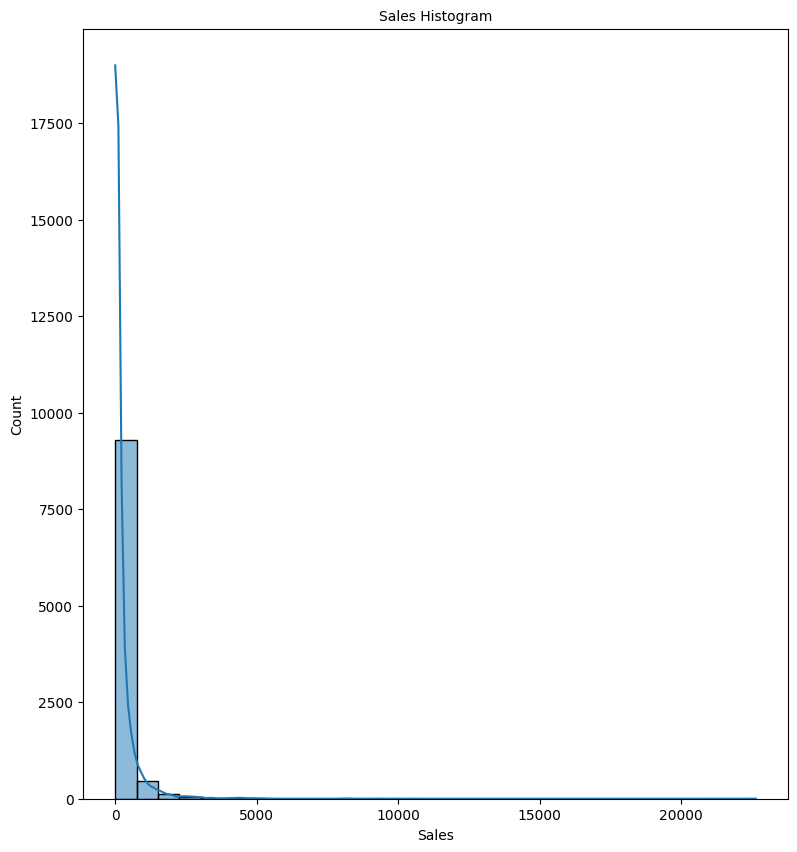

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df['Sales'],kde=True,bins=30)
plt.title('Sales Histogram',fontsize=10)
plt.show()

In [73]:
Q1_amount = df['Sales'].describe()['25%']
Q3_amount = df['Sales'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['Sales'] < Q1_amount - (1.5 * iqr)) | (df['Sales']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['Sales'] > Q1_amount - (1.5 * iqr)) & (df['Sales'] < Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
11,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,AMER-2021-104948,2021-11-13,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960
9942,AMER-2020-143371,2020-12-28,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,Consumer Products,SMB,Marketing Suite - Gold,UPQPITMHDF,998.8200,9,0.00,29.9646
9947,APJ-2023-121559,2023-06-02,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,Energy,Strategic,FinanceHub,ZTX5WHU4ZQ,1925.8800,6,0.00,539.2464
9948,APJ-2023-121559,2023-06-02,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,Energy,Strategic,OneView,ZGTMROAYTX,2405.2000,8,0.00,793.7160


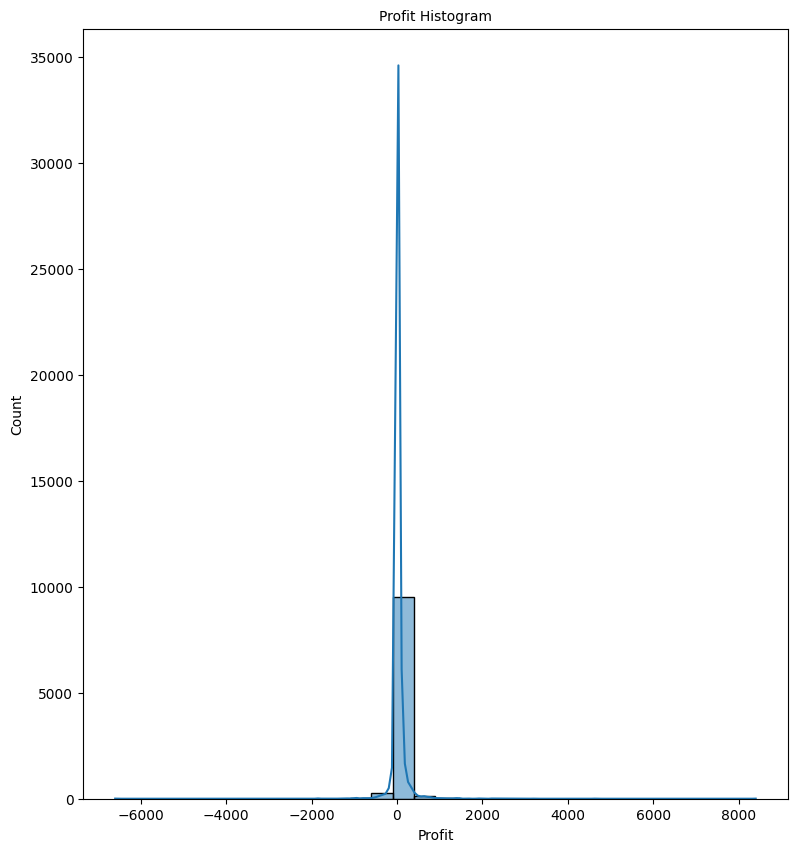

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(df['Profit'],kde=True,bins=30)
plt.title('Profit Histogram',fontsize=10)
plt.show()

# Data Understanding - After Cleaning

In [75]:
display(df.describe() ,df.describe(include= 'object'))

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


In [76]:
df.shape

(9994, 16)

## Recap data
1. There are 16 columns and 9994 row from after data cleaning
2. There are no missing Values
3. There are no Duplicate Values
4. Unused column has been dropped
5. Sales,Profit,and discount column didn't have any unatural behaviour

# Data Analysis

## Data Analysis - Featuring sales and Profit by Product

In [77]:
dfProd=df.groupby(by=['Product'])[['Sales','Profit']].sum()
dfProd.sort_values('Sales',ascending= False)

,Sales,Profit
Product,,
ContactMatcher,410378.2650,12496.2822
FinanceHub,340935.4150,32136.4203
Site Analytics,330007.0540,44515.7306
Marketing Suite - Gold,223843.6080,21278.8264
Big Ol Database,189238.6310,3384.7569
Data Smasher,167380.3180,41936.6357
Alchemy,149528.0300,55617.8249
Support,125152.7440,32864.4698
Marketing Suite,114879.9963,-3472.5560


In [78]:
sales_profit_by_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_product['Product'], 
                     y=sales_profit_by_product['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_product['Product'], 
                     y=sales_profit_by_product['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Product',
                  xaxis_title='AWS Product', yaxis_title='Amount')

fig.show()

### Insight
As illustrated by the graph, it becomes apparent that the sales volume does not necessarily correlate with the profitability for the company. 

Given this perspective, our attention can be directed towards identifying the products that contribute the most to the company's profits. In light of this, I will use the top five products with the highest profit in the following cases.

In [79]:
dfProd_Top5_profit=dfProd.sort_values(by=['Profit'],ascending=False).head().reset_index()
dfProd_Top5_profit

,Product,Sales,Profit
0,Alchemy,149528.030,55617.8249
1,Site Analytics,330007.054,44515.7306
2,Data Smasher,167380.318,41936.6357
3,Support,125152.744,32864.4698
4,FinanceHub,340935.415,32136.4203


In [80]:
fig = px.pie(dfProd_Top5_profit, 
             values='Profit', 
             names='Product', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Top 5 product profit analysis', title_font=dict(size=24))

fig.show()

In [81]:
# Lets us see the marginal value between all of the profit vs top 5 profit
print('Total Profit : {}'.format(df['Profit'].sum()))
print('Top 5 Profit : {}'.format(dfProd_Top5_profit['Profit'].sum()))
print('Proportion : {}%'.format(round(dfProd_Top5_profit['Profit'].sum()/df['Profit'].sum()*100)))


Total Profit : 286397.0217
Top 5 Profit : 207071.0813
Proportion : 72%


### Conclusion & Reccomendation
As evident from the provided data, AWS has generated a total profit of **$28,6397.02** from its portfolio of 14 products. However, five products stand out, accounting for **72%** of the total profit, amounting to **$20,7071.08**. It is imperative that we conduct a thorough investigation and engage in discussions with the `Product and Sales` teams.

Taking the **Marketing Suite** product as an example, it has contributed significant sales over the last three years, totaling **$11,4879.99**. However, instead of profitability, it has incurred losses. This scenario suggests that the expenses associated with maintaining this product may outweigh the profits. These expenses could include promotional costs, maintenance expenses, and more.

After conducting a comprehensive investigation, if we cannot ensure the sustainability of a product, it would be prudent to discontinue those with lower profitability and focus our efforts exclusively on those that yield higher profits.

## Data Analysis - Featuring Customer Segmentation and Product

In [82]:
dfSegment=df.groupby(by=['Segment'])[['Sales','Profit']].sum().reset_index()
dfSegment

,Segment,Sales,Profit
0,Enterprise,4.296531e+05,60298.6785
1,SMB,1.161401e+06,134119.2092
2,Strategic,7.061464e+05,91979.1340


In [83]:
color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=dfSegment['Segment'], 
                     y=dfSegment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[1]))
fig.add_trace(go.Bar(x=dfSegment['Segment'], 
                     y=dfSegment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[2]))

fig.update_layout(title='Sales and Profit Analysis by Segment',
                  xaxis_title='Consumer Segmentation', yaxis_title='Amount')

fig.show()

### Insight

As depicted in the graph, it is reasonable to infer that Small Medium Business companies are taking the lead in both sales and profitability, with a clear correlation between higher sales and higher profits. With this graph as our point of reference, let's delve into the preferred products within each segment to gain a deeper understanding of customer preferences.

In [84]:
dfSegment_Product=df.groupby(by=['Segment','Product'])[['Quantity']].sum().reset_index()
dfSegment_Product

,Segment,Product,Quantity
0,Enterprise,Alchemy,47
1,Enterprise,Big Ol Database,82
2,Enterprise,ChatBot Plugin,525
3,Enterprise,ContactMatcher,1331
4,Enterprise,Data Smasher,517
5,Enterprise,FinanceHub,690
6,Enterprise,Marketing Suite,101
7,Enterprise,Marketing Suite - Gold,539
8,Enterprise,OneView,252
9,Enterprise,SaaS Connector Pack,643


In [85]:
dfSegment_Product_Enterprise = dfSegment_Product[dfSegment_Product['Segment']=='Enterprise'].sort_values('Quantity',ascending=False)
fig = px.pie(dfSegment_Product_Enterprise, 
             values='Quantity', 
             names='Product', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Most product sold analysis in Segment Enterprise', title_font=dict(size=24))

fig.show()

In [86]:
dfSegment_Product_SMB = dfSegment_Product[dfSegment_Product['Segment']=='SMB'].sort_values('Quantity',ascending=False)
fig = px.pie(dfSegment_Product_SMB, 
             values='Quantity', 
             names='Product', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Most product sold in Segment Enterprise', title_font=dict(size=24))

In [87]:
dfSegment_Product_Strategic = dfSegment_Product[dfSegment_Product['Segment']=='Strategic'].sort_values('Quantity',ascending=False)
fig = px.pie(dfSegment_Product_Strategic, 
             values='Quantity', 
             names='Product', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Most product sold analysis in Segment Strategic', title_font=dict(size=24))

### Conclusion & Reccomendation

As evident from the graph, it is reasonable to conclude that the distribution of products within each segmentation is relatively uniform. The top five products used across all segments are consistently `Contact Matcher, Support, FinanceHub, SaaS Connector Pack, and Site Analytics.` Given the assumption that the needs of each segmentation are similar, and considering the data trends suggesting that higher sales result in greater profits, we can prioritize these five products for the R&D team's attention. This includes further development, enhancements, and the addition of features to enhance customer satisfaction, ultimately leading to increased sales and greater profitability for each product.

## Data Analysis - Featuring sales and Industry by Region

In [88]:
dfIndustry=df.groupby(by=['Industry'])[['Sales']].sum().sort_values('Sales',ascending=False)
dfIndustry

,Sales
Industry,
Finance,474150.4844
Energy,304644.1409
Manufacturing,295192.3812
Healthcare,273183.2882
Tech,263169.0277
Consumer Products,224044.1422
Retail,223072.0720
Communications,120962.2365
Transportation,90191.3276


In [89]:
dfIndustry=dfIndustry.reset_index()
fig = px.bar(dfIndustry, x='Industry', 
             y='Sales', 
             title='Sales analysis by Industry')
fig.show()

### Insight 

As indicated by the graph, it is evident that the Finance Industry company generates significantly higher sales compared to other industries, surpassing them by approximately **36%** or more. To gain a deeper understanding, let's select the top 5 industries as a sample and track the year-to-year changes in their orders. To facilitate this analysis, we will introduce a new `Year` column.


In [90]:
df['Year'] = df['Order Date'].dt.strftime('%Y')

In [91]:
dfFinance=df.loc[(df['Industry'].isin(['Finance','Energy','Manufacturing','HealthCare','Tech']))]
dfFinance_yearly=dfFinance.groupby(by=['Year','Industry'])[['Order ID']].count().reset_index()
dfFinance_yearly

,Year,Industry,Order ID
0,2020,Energy,243
1,2020,Finance,375
2,2020,Manufacturing,243
3,2020,Tech,299
4,2021,Energy,271
5,2021,Finance,427
6,2021,Manufacturing,253
7,2021,Tech,276
8,2022,Energy,339
9,2022,Finance,575


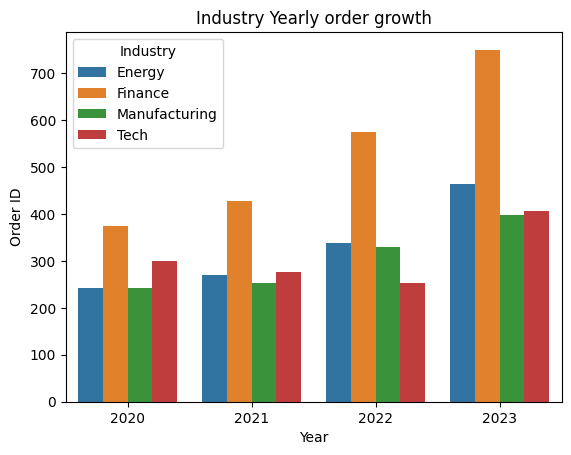

In [92]:
sns.barplot(dfFinance_yearly,x='Year',y='Order ID',hue='Industry')
plt.title('Industry Yearly order growth')
plt.show()

### Conclusion and Reccomendation

As the graph clearly demonstrates, there has been a noticeable uptick in the number of orders placed within the 5 selected industries with the highest sales. To leverage this insight, it's imperative that we proactively respond by offering tailored solutions that address their feedback and incorporate new features. Additionally, we should focus on resolving their challenges effectively, setting a precedent for other companies within each industry to follow suit. This collective effort is poised to drive a substantial increase in order growth.

## Data Analysis - Featuring Year and monthly Profit

In [93]:
# Add month for assisting the analysis
df['Month'] = df['Order Date'].dt.strftime('%B')
dfProfit_Yearly_Month= df.groupby(by=['Year','Month'])[['Profit']].sum().reset_index()
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
dfProfit_2020_Month=dfProfit_Yearly_Month[dfProfit_Yearly_Month['Year']=='2020'].sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
dfProfit_2021_Month=dfProfit_Yearly_Month[dfProfit_Yearly_Month['Year']=='2021'].sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
dfProfit_2022_Month=dfProfit_Yearly_Month[dfProfit_Yearly_Month['Year']=='2022'].sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
dfProfit_2023_Month=dfProfit_Yearly_Month[dfProfit_Yearly_Month['Year']=='2023'].sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
display(dfProfit_2020_Month,dfProfit_2021_Month,dfProfit_2022_Month,dfProfit_2023_Month)

,Year,Month,Profit
4,2020,January,2446.7711
3,2020,February,865.7280
7,2020,March,498.7299
0,2020,April,3488.8352
8,2020,May,2738.7096
6,2020,June,4976.5244
5,2020,July,-841.4826
1,2020,August,5318.1050
11,2020,September,8328.0994
10,2020,October,3448.2573


,Year,Month,Profit
16,2021,January,-3281.0070
15,2021,February,2813.8508
19,2021,March,9732.0978
12,2021,April,4187.4962
20,2021,May,4667.8690
18,2021,June,3335.5572
17,2021,July,3288.6483
13,2021,August,5355.8084
23,2021,September,8209.1627
22,2021,October,2817.3660


,Year,Month,Profit
28,2022,January,2824.8233
27,2022,February,4996.2467
31,2022,March,3625.2715
24,2022,April,2957.8446
32,2022,May,8627.4764
30,2022,June,4499.5845
29,2022,July,4464.6602
25,2022,August,2328.3534
35,2022,September,9360.4910
34,2022,October,15763.3797


,Year,Month,Profit
40,2023,January,7208.6826
39,2023,February,1605.6478
43,2023,March,12957.8999
36,2023,April,2803.6308
44,2023,May,6274.4578
42,2023,June,8087.6684
41,2023,July,6623.5571
37,2023,August,8894.4486
47,2023,September,11395.4394
46,2023,October,9440.6608


In [94]:
fig = px.line(dfProfit_2020_Month, 
              x='Month', 
              y='Profit', 
              title='Monthly Profit Analysis 2020')
fig.show()

In [95]:
fig = px.line(dfProfit_2021_Month, 
              x='Month', 
              y='Profit', 
              title='Monthly Profit Analysis 2021')
fig.show()

In [96]:
fig = px.line(dfProfit_2022_Month, 
              x='Month', 
              y='Profit', 
              title='Monthly Profit Analysis 2022')
fig.show()

In [97]:
fig = px.line(dfProfit_2023_Month, 
              x='Month', 
              y='Profit', 
              title='Monthly Profit Analysis 2023')
fig.show()

### Insight
Based on the observed pattern, it's reasonable to hypothesize that the highest profits are likely to occur in Q4, which corresponds to the year-end. Consequently, we will conduct a quarterly analysis to discern this pattern more precisely.


In [98]:
df2020q1=dfProfit_2020_Month[dfProfit_2020_Month['Month'].isin(['January','February','March'])].sum()
df2020q2=dfProfit_2020_Month[dfProfit_2020_Month['Month'].isin(['April','May','June'])].sum()
df2020q3=dfProfit_2020_Month[dfProfit_2020_Month['Month'].isin(['July','August','Sept'])].sum()
df2020q4=dfProfit_2020_Month[dfProfit_2020_Month['Month'].isin(['October','November','December'])].sum()
display(df2020q1,df2020q2,df2020q3,df2020q4)

Year      202020202020        
Month     JanuaryFebruaryMarch
Profit    3811.229            
dtype: object

Year      202020202020
Month     AprilMayJune
Profit    11204.0692  
dtype: object

Year      20202020  
Month     JulyAugust
Profit    4476.6224 
dtype: object

Year      202020202020           
Month     OctoberNovemberDecember
Profit    21723.9541             
dtype: object

In [99]:
df2021q1=dfProfit_2021_Month[dfProfit_2021_Month['Month'].isin(['January','February','March'])].sum()
df2021q2=dfProfit_2021_Month[dfProfit_2021_Month['Month'].isin(['April','May','June'])].sum()
df2021q3=dfProfit_2021_Month[dfProfit_2021_Month['Month'].isin(['July','August','Sept'])].sum()
df2021q4=dfProfit_2021_Month[dfProfit_2021_Month['Month'].isin(['October','November','December'])].sum()
display(df2021q1,df2021q2,df2021q3,df2021q4)

Year      202120212021        
Month     JanuaryFebruaryMarch
Profit    9264.9416           
dtype: object

Year      202120212021
Month     AprilMayJune
Profit    12190.9224  
dtype: object

Year      20212021  
Month     JulyAugust
Profit    8644.4567 
dtype: object

Year      202120212021           
Month     OctoberNovemberDecember
Profit    23309.1203             
dtype: object

In [100]:
df2022q1=dfProfit_2022_Month[dfProfit_2022_Month['Month'].isin(['January','February','March'])].sum()
df2022q2=dfProfit_2022_Month[dfProfit_2022_Month['Month'].isin(['April','May','June'])].sum()
df2022q3=dfProfit_2022_Month[dfProfit_2022_Month['Month'].isin(['July','August','Sept'])].sum()
df2022q4=dfProfit_2022_Month[dfProfit_2022_Month['Month'].isin(['October','November','December'])].sum()
display(df2022q1,df2022q2,df2022q3,df2022q4)

Year      202220222022        
Month     JanuaryFebruaryMarch
Profit    11446.3415          
dtype: object

Year      202220222022
Month     AprilMayJune
Profit    16084.9055  
dtype: object

Year      20222022  
Month     JulyAugust
Profit    6793.0136 
dtype: object

Year      202220222022           
Month     OctoberNovemberDecember
Profit    38042.1792             
dtype: object

In [101]:
df2023q1=dfProfit_2023_Month[dfProfit_2023_Month['Month'].isin(['January','February','March'])].sum()
df2023q2=dfProfit_2023_Month[dfProfit_2023_Month['Month'].isin(['April','May','June'])].sum()
df2023q3=dfProfit_2023_Month[dfProfit_2023_Month['Month'].isin(['July','August','Sept'])].sum()
df2023q4=dfProfit_2023_Month[dfProfit_2023_Month['Month'].isin(['October','November','December'])].sum()
display(df2023q1,df2023q2,df2023q3,df2023q4)

Year      202320232023        
Month     JanuaryFebruaryMarch
Profit    21772.2303          
dtype: object

Year      202320232023
Month     AprilMayJune
Profit    17165.757   
dtype: object

Year      20232023  
Month     JulyAugust
Profit    15518.0057
dtype: object

Year      202320232023           
Month     OctoberNovemberDecember
Profit    27656.0807             
dtype: object

### Conclusion and Reccomendation

After segmenting the data into quarters, a consistent pattern emerges, with Q2 and Q4 showing an upward trend in most years (with the exception of 2023), while Q1 and Q3 exhibit a decline, suggesting a resting period for each year.

With this understanding in mind, we can strategize by allocating additional resources and intensifying marketing efforts such as promotions, new product launches, and campaigns during the resting periods. This proactive approach aims to boost sales and maximize profits, potentially achieving levels similar to those seen in Q2 and Q4.

## Data Analysis - Featuring Countries and Profit

In [102]:
dfCountries=df.groupby(by=['Country'])[['Profit']].sum().sort_values('Profit',ascending=False).reset_index()
display(dfCountries.head(10),dfCountries.tail(10))

,Country,Profit
0,United States,76381.3871
1,United Kingdom,74989.0891
2,Canada,33402.6517
3,Brazil,24463.1876
4,Spain,18597.9504
5,India,18382.9363
6,Finland,16250.0433
7,Luxembourg,10823.1874
8,Ireland,10249.1561
9,Philippines,9977.3748


,Country,Profit
38,Belgium,-1190.4705
39,Germany,-3399.3017
40,Chile,-3427.9246
41,South Africa,-5341.6936
42,Russia,-6527.8579
43,Sweden,-7490.9122
44,Australia,-12607.8870
45,France,-15559.9603
46,Mexico,-16971.3766
47,Japan,-25729.3563


In [103]:
dfcorr=df.corr(method = 'spearman').apply(lambda x:round(x,2))
dfcorr

,Sales,Quantity,Discount,Profit
Sales,1.00,0.33,-0.06,0.52
Quantity,0.33,1.00,-0.00,0.23
Discount,-0.06,-0.00,1.00,-0.54
Profit,0.52,0.23,-0.54,1.00


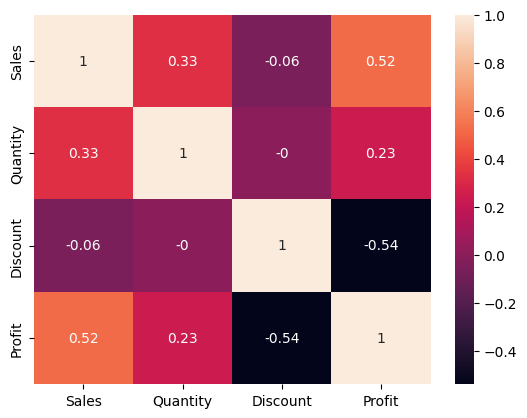

In [104]:
sns.heatmap(dfcorr,annot=True)
plt.show()

### Insight
The data presented above reveals the top ten countries contributing the highest sales and the bottom ten countries resulting in losses. Upon further analysis of various variables, it becomes apparent that the magnitude of profit generated is closely tied to the extent of discounts offered.

In [105]:
dfCountrydiscountprofit=df[df['Country'].isin(['United Kingdom','Canada','Brazil','Spain','India','Finland','Luxembourg','Ireland','Philphines'])&df['Discount']>0]
dfCountrydiscountprofit=dfCountrydiscountprofit.groupby(by=['Country','Discount'])[['License']].count().reset_index()
dfCountrydiscountprofit


,Country,Discount,License
0,Brazil,0.1,18
1,Canada,0.2,162
2,United Kingdom,0.1,76
3,United Kingdom,0.2,218
4,United Kingdom,0.4,28


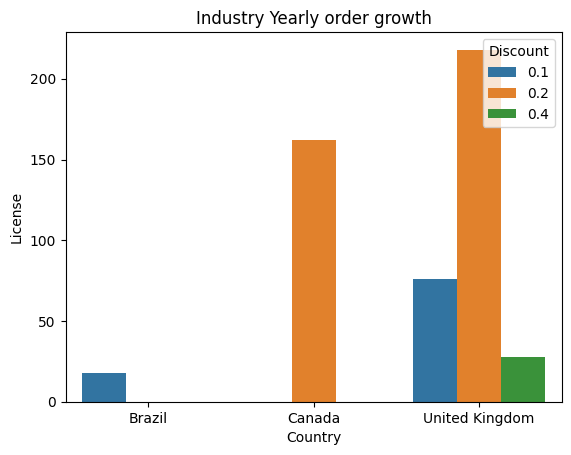

In [106]:
sns.barplot(dfCountrydiscountprofit,x='Country',y='License',hue='Discount')
plt.title('Industry Yearly order growth')
plt.show()

In [107]:
dfCountrydiscountloss=df[df['Country'].isin(['Belgium','Germany','Chile','South Africa','Russia','Sweden','Australia','France','MExico','Japan'])&df['Discount']>0]
dfCountrydiscountloss=dfCountrydiscountloss.groupby(by=['Country','Discount'])[['License']].count().reset_index()
dfCountrydiscountloss

,Country,Discount,License
0,Australia,0.20,264
1,Australia,0.30,53
2,Australia,0.50,18
3,Australia,0.60,57
4,Australia,0.80,100
5,Belgium,0.20,100
6,Belgium,0.50,5
7,Belgium,0.70,19
8,Chile,0.20,174
9,Chile,0.50,9


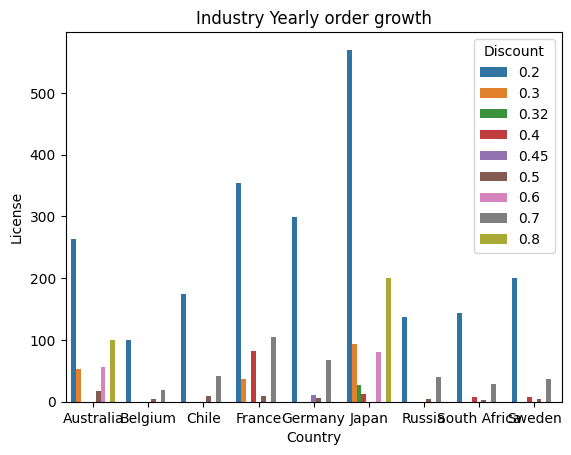

In [108]:
sns.barplot(dfCountrydiscountloss,x='Country',y='License',hue='Discount')
plt.title('Industry Yearly order growth')
plt.show()

In [109]:
def get_coordinates(country):
        geolocator = Nominatim(user_agent="geoapi")
        location = geolocator.geocode(country,exactly_one=True)
        return location.latitude, location.longitude

dfCountries[['latitude', 'longitude']] = dfCountries['Country'].apply(get_coordinates).apply(pd.Series)
dfCountries

,Country,Profit,latitude,longitude
0,United States,76381.3871,39.783730,-100.445882
1,United Kingdom,74989.0891,54.702354,-3.276575
2,Canada,33402.6517,61.066692,-107.991707
3,Brazil,24463.1876,-10.333333,-53.200000
4,Spain,18597.9504,39.326068,-4.837979
5,India,18382.9363,22.351115,78.667743
6,Finland,16250.0433,63.246778,25.920916
7,Luxembourg,10823.1874,49.611277,6.129799
8,Ireland,10249.1561,52.865196,-7.979460
9,Philippines,9977.3748,12.750349,122.731210


In [110]:
Map = folium.Map(location=(29.6166068,7.8992381),zoom_start=1)
for i in dfCountries.head(10).index:
    mapMarker = folium.Marker(location=[dfCountries['latitude'][i],dfCountries['longitude'][i]],
                              tooltip=dfCountries['Country'][i],
                              popup = f"Profit {dfCountries['Profit'][i]}",
                              icon = folium.Icon(color='red', icon='info-sign')
    )   
    mapMarker.add_to(Map)
Map

### Conclusion and Reccomendation
As the graph illustrates, a distinct correlation becomes apparent between the discount magnitude and the resultant profit. Among the top 10 countries that yield the highest profits, discounts typically fall within the range of 0-2%. Conversely, in the case of the top 10 countries experiencing the greatest losses, the discount range becomes more varied, and the overall amount of discounts given is notably higher, underscoring the negative impact of larger discount percentages on profitability.

In light of these observations, it is crucial that we reassess the application of discounts for each transaction in every country to proactively reduce the risk of losses.


## Data Analysis - Featuring Depencies between top 10 Country with the highest profit and top 5 Industry with highest sales amount

In [111]:
dfdependent=df[(df['Country'].isin(['United Kingdom','Canada','Brazil','Spain','India','Finland','Luxembourg','Ireland','Philphines'])&df['Industry'].isin(['Finance','Energy','Manufacturing','HealthCare','Tech']))]
dfdependent

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Month
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136,2022,November
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.940,3,0.0,219.5820,2022,November
13,AMER-2022-161389,2022-12-06,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,Tech,SMB,ContactMatcher,COK66F8IC1,407.976,3,0.2,132.5922,2022,December
44,EMEA-2022-118255,2022-03-12,Gavin Mitchell,Luxembourg,Luxembourg,EMEA,EU-WEST,Sony,Tech,Strategic,Data Smasher,F4GWWGL9KR,45.980,2,0.0,19.7714,2022,March
45,EMEA-2022-118255,2022-03-12,Gavin Mitchell,Luxembourg,Luxembourg,EMEA,EU-WEST,Sony,Tech,Strategic,ContactMatcher,JFCUNTQD5P,17.460,2,0.0,8.2062,2022,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,EMEA-2021-103772,2021-06-28,Dylan Ogden,Finland,Tampere,EMEA,NOR,HonHai Precision Industry,Tech,Enterprise,ChatBot Plugin,6Z9YI13RQ8,140.750,5,0.0,42.2250,2021,June
9982,AMER-2022-157728,2022-09-23,Rebecca Dickens,Brazil,São Paulo,AMER,LATAM,Amazon,Tech,SMB,Support,A3XS9BYHG8,35.560,7,0.0,16.7132,2022,September
9983,AMER-2022-157728,2022-09-23,Rebecca Dickens,Brazil,São Paulo,AMER,LATAM,Amazon,Tech,SMB,Site Analytics,VMRUEJZVLR,97.980,2,0.0,27.4344,2022,September
9987,EMEA-2023-163629,2023-11-18,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964,2023,November


In [112]:
# dfdependentpivot=pd.pivot_table(dfdependent[['Country','Industry']], values='Industry', index='Country',columns='Industry', aggfunc=len)
# dfdependentpivot
dfcross=pd.crosstab(dfdependent['Country'], df['Industry'])
dfcross

Industry,Energy,Finance,Manufacturing,Tech
Country,,,,
Brazil,35,40,35,23
Canada,69,129,57,62
Finland,14,57,40,14
India,28,42,18,14
Ireland,26,20,13,17
Luxembourg,10,20,8,16
Spain,27,24,43,28
United Kingdom,163,265,137,141


### Insight
Based on the crosstabulation presented above, it becomes evident that there are only four industries and a total of eight countries. This suggests that within the selected countries, some companies on selected Industry might not have utilized AWS products.

In [113]:
p_val = chi2_contingency(dfcross)[1]

if p_val > 0.05:
    print('Chi-Squared Test Result: {}'.format(p_val))
    print("Two variables are Independent")
else:
    print('Chi-Squared Test Result: {}'.format(p_val))
    print("Two variables are Dependent")

Chi-Squared Test Result: 9.408526729106942e-07
Two variables are Dependent


<Axes: xlabel='Country'>

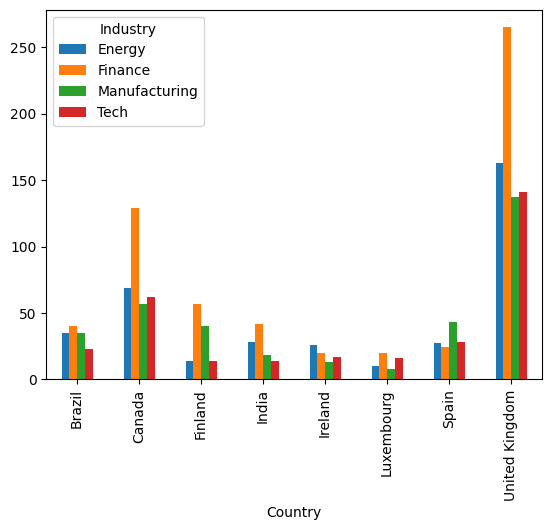

In [114]:
pd.crosstab(dfdependent['Country'], dfdependent['Industry']).plot(kind='bar')

### Conclusion and Reccomendation

From the analysis conducted previously, it is evident that there exists a correlation between the industry type and the countries. Based on the provided sample, we can conclude that by enhancing the strong point of our company and demonstrating the benefits of our products to potential customers, we can increase overall customer satisfaction. This, in turn, is likely to lead to greater adoption of our products by other companies within the same industry in the following country.


In [115]:
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year,Month
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022,November
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022,November
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022,June
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021,October
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,2020,January
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,2023,February
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,2023,February
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,2023,February


In [ ]:
df.to_excel("tableu.xlsx")